In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cleaned_filtered_data.csv')

C:\Users\19842\AppData\Local\Temp\ipykernel_35768\1168696831.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cleaned_filtered_data.csv')


In [3]:
print(data.head())

   iCIK     iCUSIP pSP_TICKER iPERIOD_END      iQTY  iMARKET_VALUE  \
0  2230  20030N101      CMCSA  2013-09-30  452300.0     20421000.0   
1  3520  20030N101      CMCSA  2013-09-30    5425.0       245000.0   
2  5272  20030N101      CMCSA  2013-09-30    4084.0       184262.0   
3  7789  20030N101      CMCSA  2013-09-30   26020.0      1174000.0   
4  8565  20030N101      CMCSA  2013-09-30  207888.0      9379000.0   

   iLONG_FRACTION  pSP_VOLUME  pSP_OPEN  pSP_HIGH  pSP_LOW  pSP_CLOSE  \
0        0.015565    36443680    22.115    22.655   22.115    22.5575   
1        0.000047    36443680    22.115    22.655   22.115    22.5575   
2        0.000002    36443680    22.115    22.655   22.115    22.5575   
3        0.007314    36443680    22.115    22.655   22.115    22.5575   
4        0.001936    36443680    22.115    22.655   22.115    22.5575   

   daily_return    return  average_volume  volatility      turnover  \
0      0.020009  0.151834      36443680.0    0.003311  43920.843506  

In [4]:
data.shape

(15017921, 18)

### Simple Strategy, hold the most holdings from the last Quarter as the holding for next quarter

In [5]:
data["iPERIOD_END"] = pd.to_datetime(data["iPERIOD_END"])

# Preprocess data
quarters = data["iPERIOD_END"].unique()
quarters.sort()

# Initialize an empty DataFrame to store the selected stocks and their performance
selected_stocks = pd.DataFrame(columns=data.columns)

# Initialize a list to store the quarterly PnL
pnl = []

In [6]:
# Create an empty DataFrame to store the selected stocks
selected_stocks = pd.DataFrame(columns=data.columns)

# Initialize the pnl and quarters_with_data lists
pnl = []
quarters_with_data = []

# Loop over quarters
for i in range(1, len(quarters)):
    # Get the data for the previous quarter
    prev_quarter = data[data["iPERIOD_END"] == quarters[i - 1]]
    
    # Get the top 100 stocks based on high return and high market value
    top100 = prev_quarter.sort_values(["return"],
                                      ascending=[False]).head(50)
    
    # Get the data for the current quarter
    curr_quarter = data[data["iPERIOD_END"] == quarters[i]]
    
    # Merge the top 100 stocks with the current quarter data
    merged_data = top100.merge(curr_quarter, on=["iCUSIP", "iCIK"])
    
    # Check if there is any matching data for the current quarter
    if not merged_data.empty:
        # Calculate the average return for the current quarter
        avg_return = merged_data["return_y"].mean()
        print(f"the average return of this quarter is {avg_return}")
        pnl.append(avg_return)
        
        # Append the selected stocks to the main DataFrame
        selected_stocks = pd.concat([selected_stocks, merged_data], ignore_index=True)
        
        # Append the current quarter to the quarters_with_data list
        quarters_with_data.append(quarters[i])

# Calculate the cumulative return
cumulative_return = (1 + np.array(pnl)).cumprod()

the average return of this quarter is -0.17867890762369418
the average return of this quarter is -0.27555621027199856
the average return of this quarter is -0.23973192479953911
the average return of this quarter is -0.24929218496212316
the average return of this quarter is -0.11216507382053217
the average return of this quarter is -0.11324399494310997
the average return of this quarter is -0.468986093814861
the average return of this quarter is 0.10167904944793825
the average return of this quarter is 0.5881008574218571
the average return of this quarter is 0.11262288012618683
the average return of this quarter is 0.5502686108979279
the average return of this quarter is -0.0035762904047668092
the average return of this quarter is 0.5367072315823469
the average return of this quarter is 2.2562484675528167


In [7]:
print(cumulative_return)

[0.82132109 0.59500096 0.45236024 0.33959037 0.30150019 0.2673571
 0.14197034 0.15640575 0.2483881  0.27636229 0.42843578 0.42690357
 0.6560258  2.136183  ]


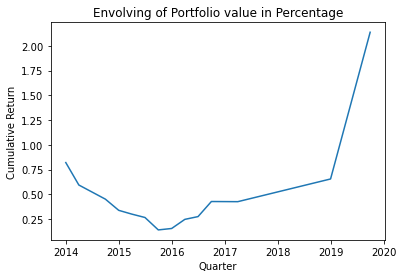

In [9]:
# Plot the cumulative return
plt.plot(quarters_with_data, cumulative_return)
plt.xlabel("Quarter")
plt.ylabel("Cumulative Return")
plt.title("Envolving of Portfolio value in Percentage")
plt.show()

### Bad performance, highly unstable, try to use ML models